# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

Utilizaremos uma "Árvore de Decisão".


Importando a base e fazendo as verificações iniciais de consistência:

In [13]:
import pandas as pd

data = pd.read_csv('./emp_automovel.csv')
data.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


A base se encontra completa, sem dados nulos.

Separando as variáveis explicativas e a variável alvo:

In [15]:
x = data.drop('inadimplente', axis=1)
y = data['inadimplente']

Criando um modelo com parâmetros default e usando toda a base para o treinamento. Corremos o risco de overfitting. Isso pode ser visto com o método `score`, que retorna a média de acurácia do modelo.

A acurácia é a "taxa de acertos". É a quantidade de acertos do modelo (verdadeiros positivos (TP) e verdadeiros negativos (TN)) dividido por todas as entradas (verdadeiros positivos e negativos (TP e TN) e falsos positivos e negativos (FP e FN)).

$acurácia = \frac{TP + TN}{TP + TN + FP + FN}$

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x, y)
model.score(x, y)

1.0

A acurácia foi de 1.0, ou seja, 100%, indicando um possível overfitting. Como usamos 100% da base para o treinamento, não temos dados novos para testá-la.

### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em **dados independentes**.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos **separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste**.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais **desde o momento inicial** para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

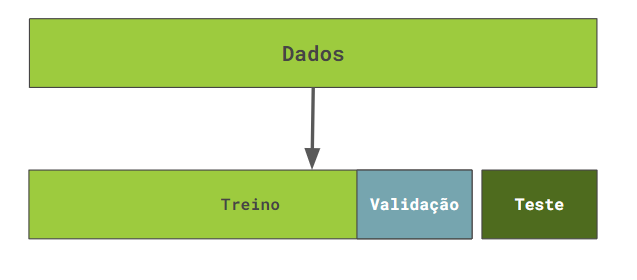

O conjunto de teste possibilita que apliquemos uma "prova final" ao modelo escolhido, avaliando como ele se comporta com dados não vistos anteriormente. Enquanto isso, **usamos o conjunto de *treino* e *validação* para avaliar diferentes modelos e hiperparâmetros, até chegar à decisão de qual modelo será escolhido**.

Para separarmos a base de dados nestes três conjuntos, podemos fazer uma combinação de chamada da função `train_test_split` duas vezes. Na primeira chamada, iremos criar o conjunto de teste. Na segunda chamada da função, iremos separar o restante dos dados entre os conjuntos de treino e validação. 

Em nosso exemplo, iremos indicar que queremos separar 15% dos dados para teste usando o parâmetro `test_size`. O restante será separado para treino e validação com os parâmetros default da função.

In [17]:
from sklearn.model_selection import train_test_split

# reserving 15% of data for testing
x, x_test, y, y_test = train_test_split(x, y, test_size=.15, stratify=y, random_state=5)

# splitting the remaining data for training and validation
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=5, stratify=y)

In [5]:
print(f'Treino:\nX:${x_train.shape}\nY:{len(y_train)}\n')
print(f'Validação:\nX:${x_val.shape}\nY:{len(y_val)}\n')
print(f'Teste:\nX:${x_test.shape}\nY:{len(y_test)}\n')
print(f'Total: ${data.shape}')

Treino:
X:$(34440, 10)
Y:34440

Validação:
X:$(11481, 10)
Y:11481

Teste:
X:$(8104, 10)
Y:8104

Total: $(54025, 11)


Analisando novamente o modelo com os parâmetros padrão, mas agora usando somente os dados de treino para o fitting.

In [18]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print(f'Acurácia (dados de treino): {model.score(x_train, y_train)}')
print(f'Acurácia (dados de validação): {model.score(x_val, y_val)}')

Acurácia (dados de treino): 1.0
Acurácia (dados de validação): 0.847400052260256


É possível novamente verificar o provável overfitting do dados, pois a acurácia continua sendo 100% ao validar o modelo com os dados de treino novamente. Para tornar o modelo mais genérico, vamos limitar a profundidade máxima da árvore (parâmetro `max_depth`).

In [19]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train, y_train)
print(f'Acurácia (dados de treino): {model.score(x_train, y_train)}')
print(f'Acurácia (dados de validação): {model.score(x_val, y_val)}')

Acurácia (dados de treino): 0.9206445993031359
Acurácia (dados de validação): 0.9058444386377493


Agora a acurácia dos dados de treino diminuiu, no entanto, a acurácia da validação aumentou e ambas as acurácias estão com valores próximos, indicando que o modelo aprendeu "melhor" e não simplesmente decorou as entradas de treino. 

### Avaliando o modelo

A acurácia é apenas uma das métricas possíveis para validar um modelo. Ela sozinha não consegue informar se o modelo está bom de fato - ela só indica o quão bem o modelo acerta. Em uma classificação binária (nesse caso, adimplentes e inadimplentes), a acurácia não indica se ela acerta bem tanto em classificar em adimplentes (verdadeiros positivos) quanto em classificar em inadimplentes (verdadeiros negativos) - ela nos informa a média da taxa de todos os acertos.

Podemos ter uma avaliação melhor do modelo utilizando uma matriz de confusão, que compara as classificações reais com as previsões do modelo.

Vamos criar uma matriz de confusão e fazer uma análise dos dados de validação.

In [20]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_val)
confusion_mat = confusion_matrix(y_val, y_predicted)
print(confusion_mat)

[[10356   123]
 [  958    44]]


Podemos tornar a visualização mais agradável utilizando a classe `ConfusionMatrixDisplay`.

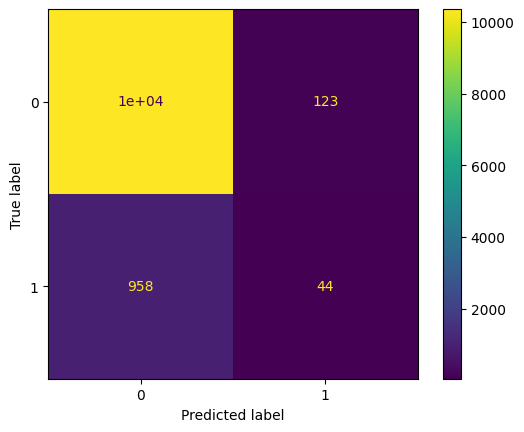

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_mat_plot = ConfusionMatrixDisplay(confusion_mat)
confusion_mat_plot.plot();

Podemos melhorar um pouco mais a visualização dando nomes mais específicos para cada tick nas labels, ao invés de 0 e 1. Podemos fazer isso com o parâmetro `display_labels`.

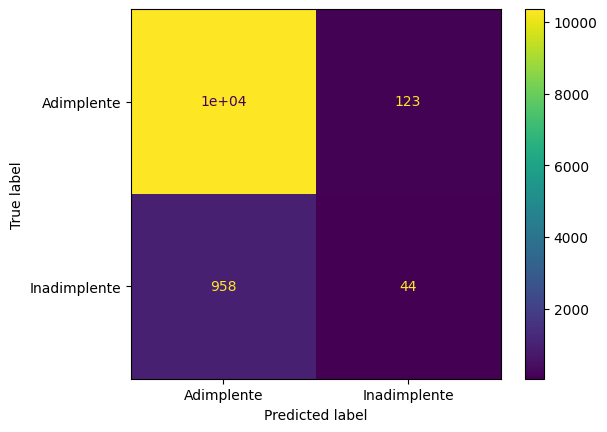

In [22]:
confusion_mat_plot = ConfusionMatrixDisplay(confusion_mat, display_labels=['Adimplente', 'Inadimplente'])
confusion_mat_plot.plot();

Entendendo a matriz de confusão:

- Vamos assumir como "positivo" (1) a classificação "**in**adimplente" e como "negativo" (0), a classificação "adimplente", pois na base de dados a variável alvo são os inadimplentes, então 1 significa presença e 0 significa ausência desse atributo;

- O primeiro quadrante indica os **Verdadeiros Negativos (TN - True Negative)**, ou seja, a quantidade de pessoas que eram adimplentes (0) e que o modelo classificou corretamente como adimplentes (0);

- O segundo quadrante indica os **Falsos Positivos (FP - False Positive)**, ou seja, a quantidade de pessoas que eram adimplentes (0) e que o modelo classificou *incorretamente* como inadimplentes (1). O modelo atribuiu positivo, mas isso é falso;

- O terceiro quadrante indica os **Falsos Negativos (FN - False Negative)**, ou seja, a quantidade de pessoas que eram inadimplentes (1) e que o modelo classificou *incorretamente* como adimplentes (0). O modelo atribuiu negativo, mas isso é falso;

- O quarto quadrante indica os **Verdadeiros Positivos (TP - True Positive)**, ou seja, a quantidade de pessoas que eram inadimplentes (1) e que o modelo classificou corretamente como inadimplentes (1).

- A diagonal principal representa os acertos do modelo, enquanto a secundária representa os erros. O melhor cenário é uma diagonal principal com valores altos e uma diagonal secundária com valores baixos.

Analisando a matriz de confusão, podemos ver que o modelo acertou muito bem na classificação dos clientes adimplentes (alto valor de TN, baixo valor de FP). No entanto, na classificação dos clientes *inadimplentes*, o modelo **não** está se saindo bem, pois o valor de FN está muito mais alto que o de TP (de um universo de mais de 1000 inadimplentes, o modelo conseguiu acertar **somente 44**). Isso indica que o modelo está sendo tendencioso para o lado da classificação de adimplentes.

Aqui, conseguimos ver que a acurácia sozinha não conta toda a história, e que o melhor é adicionarmos outras métricas à nossa avaliação do modelo.

Para finalizar, é possível usar somente a `ConfusionMatrixDisplay` sem precisar calcular uma matriz de confusão com a função `confusion_matrix`:

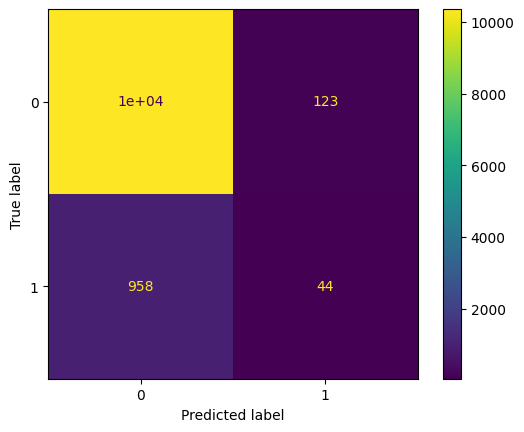

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_predicted);

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

Observando a matriz de confusão, podemos entender como são calculadas as métricas de acurácia, precisão e recall (o recall também é chamado de "sensibilidade").

Todas essas métricas geram resultados entre 0 e 1. Resultados mais próximos de 1 representam uma métrica boa.

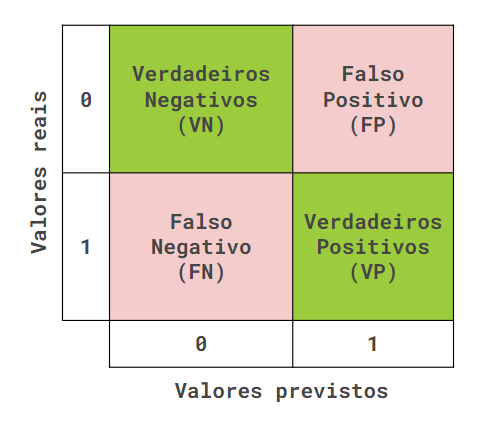

#### Acurácia 

A acurácia já foi tratada acima. Usando a matriz de confusão, ela pode ser medida pela divisão entre a diagonal principal e a soma de todos os quadrantes.

Essa métrica pode ser obtida por meio do próprio modelo, como foi visto, utilizando o método `score`. Mas ela também pode ser obtida com a função `accuracy_score`:

In [24]:
from sklearn.metrics import accuracy_score

print(f'Acurácia (método score): {model.score(x_val, y_val)}')
print(f'Acurácia (accuracy_score): {accuracy_score(y_val, y_predicted)}')

Acurácia (método score): 0.9058444386377493
Acurácia (accuracy_score): 0.9058444386377493


#### Precisão

A precisão representa quão bem o modelo está acertando a característica que queremos verificar, ou seja, leva em conta somente as previsões positivas. Neste caso, o número de falsos positivos afeta a precisão.

Pela matriz de confusão, podemos obter a precisão dividindo o TP pela soma da segunda coluna (FP+TP).

Fórmula:

$precisao = \frac {TP}{TP + FP}$

In [25]:
from sklearn.metrics import precision_score

precision_score(y_val, y_predicted)

0.2634730538922156

#### Recall (sensibilidade)

O recall vai olhar para a proporção de acertos positivos do modelo, no universo dos valores positivos reais. A quantidade de falsos negativos, neste caso, prejudica a métrica de recall.

Pela matriz de confusão, é a divisão de TP pela soma da segunda *linha* (FN+TP).

Fórmula: 

$recall = \frac {TP}{TP + FN}$

In [26]:
from sklearn.metrics import recall_score

recall_score(y_val, y_predicted)

0.043912175648702596

Pelos valores de precisão e recall, podemos novamente verificar que o modelo não está indo bem, pois ambos estão mais próximos de zero (destaque para o recall: 0.04).

Para o nosso cliente, o mais prejudicial é tomar prejuízo, ou seja, alugar para um potencial cliente inadimplente. Com isso, **a métrica mais importante para *nosso* problema é o recall**.

#### F1 Score

Essa métrica é um equilíbro entre precisão e recall, levando em conta ambos. Sua fórmula é uma média harmônica dessas duas outras métricas:

$F1 = 2 * \frac {precisao * recall} {precisao + recall}$

In [27]:
from sklearn.metrics import f1_score

f1_score(y_val, y_predicted)

0.07527801539777587

### Curva ROC (Receiver Operating Characteristic Curve)

É um gráfico construído a partir do recall, em conjunto com a taxa de falsos positivos ($\frac{FP}{TN + FP}$), que nos permite verificar se um modelo de classificação binária está conseguindo se sair bem na classificação.

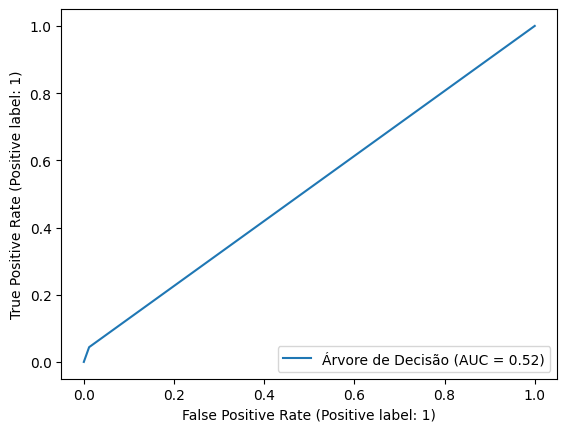

In [30]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_val, y_predicted, name='Árvore de Decisão');

O gráfico mostra o Recall x Taxa de Falsos Positivos. A inclinação da curva no gráfico nos ajuda a entender quão bem ou ruim está indo o modelo na diferenciação das classes. Curvas mais próximas de 1 no eixo y indicam um modelo bom (alta taxa de TP e baixa taxa FP), enquanto curvas mais próximas da diagonal indicam um modelo ruim, em que a classificação está sendo aleatória. 

De acordo com o gráfico, temos mais uma comprovação de que o modelo está se saindo mal. 

O gráfico também traz uma nova métrica: AUC (Area Under the ROC Curve), um valor entre 0 e 1 (quanto mais próximo de 1, melhor; valor 0.5 representa aleatoriedade). 

Podemos também calcular somente a AUC: 

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_predicted)

0.5160872072059718

### Curva de precisão x recall (PR curve)

É outra forma de visualizar a performance do modelo, recomendada para conjuntos de dados muito desbalanceados (que é o nosso caso). Neste tipo de gráfico, os casos de verdadeiros negativos (TN) não são levados em conta, o que é vantajoso para casos em que o desbalanceamento está pesando nessa parte dos dados (que é o caso do nosso exemplo). O que é importante aqui é analisar os casos positivos (sejam eles verdadeiros ou falsos).

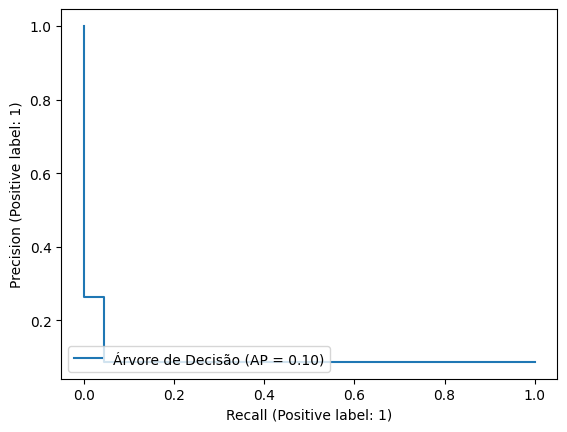

In [33]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_val, y_predicted, name='Árvore de Decisão');

Neste gráfico, devemos observar o canto superior direito (1, 1) e o inferior esquerdo (0, 0). O modelo é melhor quanto mais próximo sua curva estiver do ponto (1, 1) e pior quanto mais próximo estiver de (0, 0). Novamente, temos outra evidência de que o modelo é ruim.

Uma nova métrica é apresentada pelo gráfico, a AP (Average Precision), que também varia de 0 a 1, sendo que quanto mais próximo de 1, melhor é o desempenho do modelo.

In [34]:
from sklearn.metrics import average_precision_score

average_precision_score(y_val, y_predicted)

0.09501188388803851

### Relatório de métricas

O scikit-learn possui uma função capaz de gerar um relatório com as principais métricas de classificação:

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.08      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



O relatório traz o valor das métricas levando em conta cada classe de forma independente. Então na linha 0 temos valores de precision, recall e f1-score para a classe 0 (adimplentes), e depois para a classe 1 (inadimplentes). A coluna de suporte informa a quantidade de amostras para cada classe (e consegue evidenciar como a base está em desequilíbrio, favorecendo mais a classe dos adimplentes).

A métrica de acurácia leva em conta todas as entradas. As duas últimas métricas são uma média para precision, recall e f1-score levando em conta as duas classes (média aritmética e média ponderada - levando em conta a quantidade de amostras de cada classe).

## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

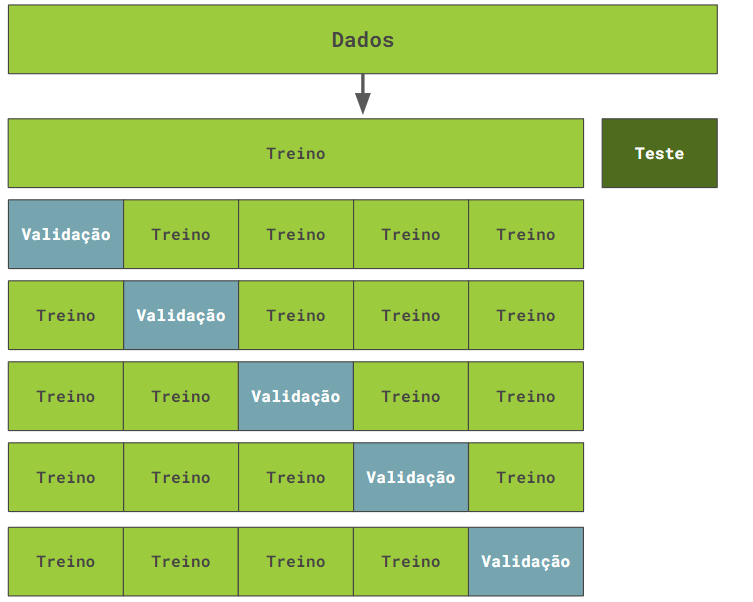

In [33]:
from sklearn.model_selection import cross_validate, KFold

In [34]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.23740792, 0.21299005, 0.22075653, 0.21707034, 0.21065998]),
 'score_time': array([0.00390935, 0.00384569, 0.0039804 , 0.00385022, 0.00543857]),
 'test_score': array([0.91246598, 0.9070122 , 0.90722997, 0.91310976, 0.89884582])}

In [35]:
cv_resultados['test_score']

array([0.91246598, 0.9070122 , 0.90722997, 0.91310976, 0.89884582])

In [36]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8974930092069496, 0.9179724757243598]


### Validação cruzada com recall

In [37]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [38]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.2190094 , 0.20586634, 0.21080422, 0.21392369, 0.20586586]),
 'score_time': array([0.01052284, 0.00677085, 0.00659442, 0.00657868, 0.01082897]),
 'test_score': array([0.02642008, 0.01856436, 0.0196802 , 0.0156658 , 0.02543353])}

In [39]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.012904413900403562, 0.029401168041219464]


### Estratificando os dados

In [40]:
dados['inadimplente'].value_counts(normalize = True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')

In [43]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01530563507862015, 0.041563428218194]


## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [46]:
y_balanceado.value_counts(normalize = True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

In [47]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [48]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7060717112685824, 0.7725966849325785]


### Pipeline para validação

In [49]:
from imblearn.pipeline import Pipeline as imbpipeline

In [50]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [51]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [52]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.19434095052168057, 0.2875753573353933]


### Undersampling

In [53]:
from imblearn.under_sampling import NearMiss

In [54]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [55]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6198778536492056, 0.7006329791315145]


### Testando o modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



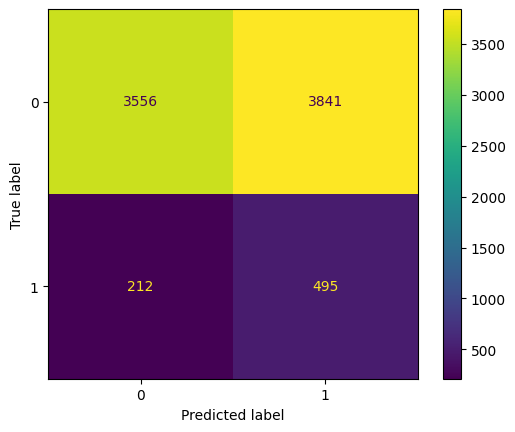

In [69]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);